# 准备工作

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['Simhei']    # 需要中文时候加

## 降维函数

In [3]:
# 定义降维函数
def 降维(x):
    if x == 0:
        return '0次'
    elif x >= 1 and x <= 10:
        return '1-10次'
    elif x >= 11 and x <= 50:
        return '10-50次'
    elif x >= 51 and x <= 100:
        return '51-100次'
    elif x >= 101 and x <= 2000:
        return '101-2000次'
    elif x >= 2000:
        return '2000以上'
    else:
        return '未知'

# 元素

In [4]:
df_ys = pd.read_csv('D:\Ori\数据处理\主站内容分层\\元素.csv')
df_ys = df_ys.drop_duplicates(subset=['素材id'])

In [219]:
df_ys.head()

,素材id,标题,下载人数,下载次数,浏览数,收藏数,内容下载率,下载区间,下载次数归一,收藏数归一,内容下载率归一,价值,分类
0,12958107,蓝色语文书籍,23,23,43,0,0.534884,10-50次,0.000256,0.000000,0.534884,0.160618,元素
1,12958108,蓝色语文学习,16,18,109,0,0.165138,10-50次,0.000200,0.000000,0.165138,0.049661,元素
2,12958109,水龙头饮用水水杯,66,82,113,1,0.725664,51-100次,0.000911,0.001267,0.725664,0.218499,元素
3,12958110,水龙头水杯饮用水,437,482,524,1,0.919847,101-2000次,0.005355,0.001267,0.919847,0.279420,元素
4,12958111,水龙头饮用水,18,19,42,0,0.452381,10-50次,0.000211,0.000000,0.452381,0.135841,元素


In [218]:
df_ys['分类'] = '元素'

In [6]:
df_ys['内容下载率'] = df_ys['下载次数'] / df_ys['浏览数']
df_ys['内容下载率'] = df_ys['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_ys.fillna(0, inplace=True)

In [7]:
df_ys.shape

(312547, 7)

In [8]:
df_ys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312547 entries, 0 to 312546
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   素材id    312547 non-null  int64  
 1   标题      312547 non-null  object 
 2   下载人数    312547 non-null  int64  
 3   下载次数    312547 non-null  int64  
 4   浏览数     312547 non-null  int64  
 5   收藏数     312547 non-null  int64  
 6   内容下载率   312547 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 19.1+ MB


In [9]:
df_ys.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,3.125470e+05,312547.000000,312547.000000,312547.000000,312547.000000,312547.000000
mean,1.321534e+07,62.323404,73.020589,110.827968,2.094546,0.320192
std,1.634958e+05,312.265808,411.446564,495.854530,9.594446,0.286297
min,1.153149e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.307506e+07,1.000000,1.000000,13.000000,0.000000,0.076923
50%,1.315320e+07,6.000000,7.000000,29.000000,0.000000,0.250000
75%,1.336548e+07,28.000000,31.000000,76.000000,1.000000,0.500000
max,1.360369e+07,54302.000000,90016.000000,115892.000000,789.000000,1.000000


In [10]:
# 将时间差转换为文本型函数
df_ys['下载区间'] = df_ys['下载次数'].apply(降维)

## 分布

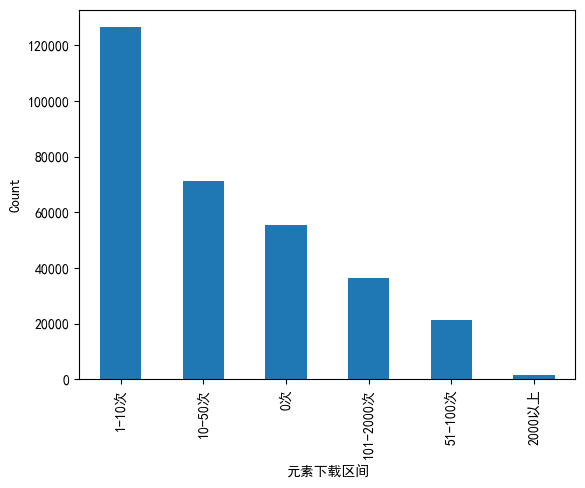

In [11]:
# 统计不同字符串类型的出现次数
counts = df_ys['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('元素下载区间')
plt.ylabel('Count')
plt.show()

In [12]:
df_ys['下载区间'].value_counts()

1-10次        126382
10-50次        71170
0次            55590
101-2000次     36534
51-100次       21435
2000以上         1436
Name: 下载区间, dtype: int64

## 归一算价值

In [13]:
# 归一化数据列
df_ys['下载次数归一'] = (df_ys['下载次数'] - df_ys['下载次数'].min()) / (df_ys['下载次数'].max() - df_ys['下载次数'].min())
df_ys['收藏数归一'] = (df_ys['收藏数'] -df_ys['收藏数'].min()) / (df_ys['收藏数'].max() - df_ys['收藏数'].min())
df_ys['内容下载率归一'] = (df_ys['内容下载率'] - df_ys['内容下载率'].min()) / (df_ys['内容下载率'].max() - df_ys['内容下载率'].min())
df_ys['价值'] = df_ys['下载次数归一'] * 0.6 + df_ys['收藏数归一'] * 0.2 + df_ys['内容下载率归一'] * 0.3

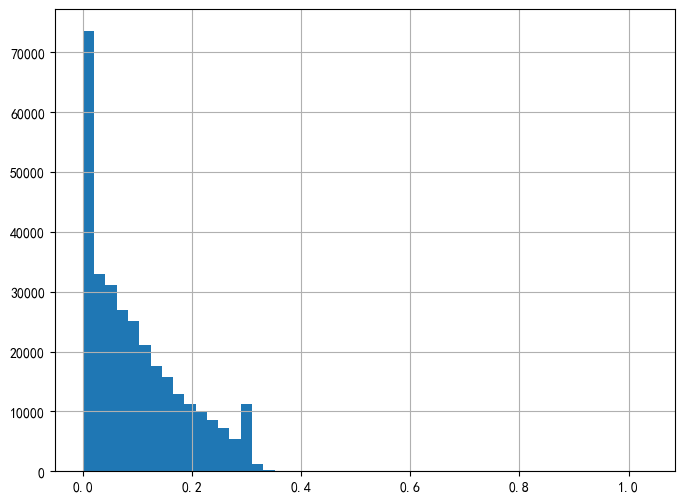

In [14]:
df_ys['价值'].hist(bins=50    # 分箱个数
             ,figsize=(8,6)    # 可视化大小
            )    # hist是直方图，看看数据整体分布
plt.show()

## 保留头部优质内容

In [232]:
ys_limit = df_ys.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(ys_limit) * 0.7)

# 保留前70%的数据
ys_limit = ys_limit.head(num_rows)

## 抽样

In [233]:
# 等距抽样
ys_sampled = ys_limit.iloc[::3]

In [234]:
ys_sampled.shape

(72928, 13)

## 随机抽样（被pass了）

In [149]:
# 计算要保留的行数
num_rows = int(len(ys_limit) * 0.3)

# 随机抽取30%的行数据并保留
selected_rows = ys_limit.sample(n=num_rows, random_state=42)

# 背景

In [286]:
df_bj = pd.read_csv('D:\Ori\数据处理\主站内容分层\\背景.csv')
df_bj.rename(columns={'背景素材id': '素材id'}, inplace=True)
df_bj = df_bj.drop_duplicates(subset=['素材id'])

In [287]:
df_bj['分类'] = '背景'

In [288]:
df_bj.head()

,素材id,标题,下载人数,下载次数,浏览数,收藏数,分类
0,6012044,疫苗针管试剂医疗背景,59,67,447,2,背景
1,6012035,简约植物手绘背景,0,0,186,0,背景
2,6012033,简约植物分层背景,1,1,109,0,背景
3,6012022,扁平打疫苗抗疫背景,22,24,253,1,背景
4,6012021,医疗疫苗抗疫疫苗,31,32,215,1,背景


In [289]:
df_bj['内容下载率'] = df_bj['下载次数'] / df_bj['浏览数']
df_bj['内容下载率'] = df_bj['内容下载率'].apply(lambda x: 1 if x >= 1 else x)

In [290]:
df_bj.fillna(0,inplace=True)

In [291]:
df_bj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66301 entries, 0 to 66303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    66301 non-null  int64  
 1   标题      66301 non-null  object 
 2   下载人数    66301 non-null  int64  
 3   下载次数    66301 non-null  int64  
 4   浏览数     66301 non-null  int64  
 5   收藏数     66301 non-null  int64  
 6   分类      66301 non-null  object 
 7   内容下载率   66301 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.6+ MB


In [292]:
df_bj.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,6.630100e+04,66301.000000,66301.000000,66301.000000,66301.000000,66301.000000
mean,6.102185e+06,83.589131,101.935190,262.554637,4.971841,0.186072
std,5.849404e+04,317.545961,412.500854,1130.210807,17.444928,0.188152
min,6.002191e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.041472e+06,3.000000,3.000000,60.000000,0.000000,0.046875
50%,6.108615e+06,11.000000,12.000000,107.000000,1.000000,0.125000
75%,6.130211e+06,39.000000,45.000000,212.000000,3.000000,0.267516
max,6.380444e+06,9641.000000,14636.000000,226784.000000,572.000000,1.000000


In [293]:
# 将时间差转换为文本型函数
df_bj['下载区间'] = df_bj['下载次数'].apply(降维)

In [294]:
df_bj['下载区间'].value_counts()

1-10次        23393
10-50次       20159
101-2000次     9350
0次            7371
51-100次       5423
2000以上         605
Name: 下载区间, dtype: int64

## 分布

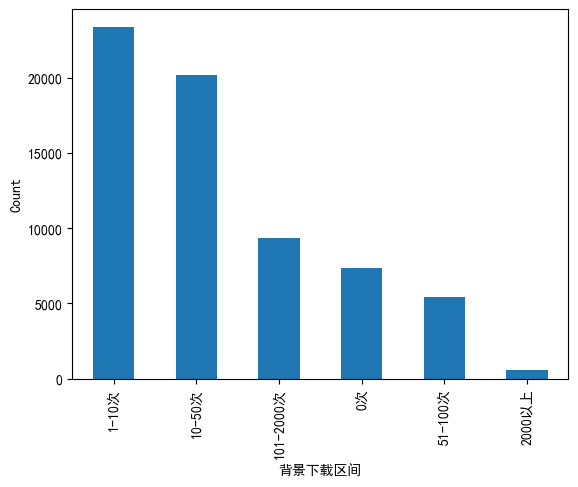

In [295]:
# 统计不同字符串类型的出现次数
counts = df_bj['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('背景下载区间')
plt.ylabel('Count')
plt.show()

## 归一算价值

In [296]:
# 归一化数据列
df_bj['下载次数归一'] = (df_bj['下载次数'] - df_bj['下载次数'].min()) / (df_bj['下载次数'].max() - df_bj['下载次数'].min())
df_bj['收藏数归一'] = (df_bj['收藏数'] -df_bj['收藏数'].min()) / (df_bj['收藏数'].max() - df_bj['收藏数'].min())
df_bj['内容下载率归一'] = (df_bj['内容下载率'] - df_bj['内容下载率'].min()) / (df_bj['内容下载率'].max() - df_bj['内容下载率'].min())
df_bj['价值'] = df_bj['下载次数归一'] * 0.6 + df_bj['收藏数归一'] * 0.2 + df_bj['内容下载率归一'] * 0.3

## 抽样

In [297]:
bj_limit = df_bj.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(bj_limit) * 0.7)

# 保留前70%的数据
bj_limit = bj_limit.head(num_rows)

In [298]:
# 等距抽样
bj_sampled = bj_limit.iloc[::3]

In [299]:
bj_sampled.shape

(15470, 13)

# 广告设计

In [31]:
df_gg = pd.read_csv('D:\Ori\数据处理\主站内容分层\\广告设计.csv')
df_gg.rename(columns={'广告设计素材id': '素材id'}, inplace=True)
df_gg = df_gg.drop_duplicates(subset=['素材id'])

In [32]:
df_gg.shape

(142211, 6)

In [222]:
df_gg['分类'] = '广告设计'

In [33]:
df_gg.fillna(0,inplace=True)

In [34]:
df_gg['内容下载率'] = df_gg['下载次数'] / df_gg['浏览数']
df_gg['内容下载率'] = df_gg['内容下载率'].apply(lambda x: 1 if x >= 1 else x)

In [35]:
df_gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142211 entries, 0 to 142239
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   素材id    142211 non-null  int64  
 1   标题      142211 non-null  object 
 2   下载人数    142211 non-null  int64  
 3   下载次数    142211 non-null  int64  
 4   浏览数     142211 non-null  int64  
 5   收藏数     142211 non-null  int64  
 6   内容下载率   141829 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 8.7+ MB


In [36]:
df_gg.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,1.422110e+05,142211.000000,142211.000000,142211.000000,142211.000000,141829.000000
mean,5.235292e+06,47.676263,70.997370,279.615592,7.838268,0.160172
std,8.946385e+04,129.617958,189.436156,1325.440128,19.816629,0.178484
min,5.048032e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.155350e+06,2.000000,3.000000,61.000000,0.000000,0.044118
50%,5.203452e+06,10.000000,14.000000,125.000000,2.000000,0.114286
75%,5.327118e+06,37.000000,58.000000,288.000000,7.000000,0.215385
max,5.392978e+06,6246.000000,8841.000000,460059.000000,575.000000,1.000000


In [37]:
# 将时间差转换为文本型函数
df_gg['下载区间'] = df_gg['下载次数'].apply(降维)

## 分布

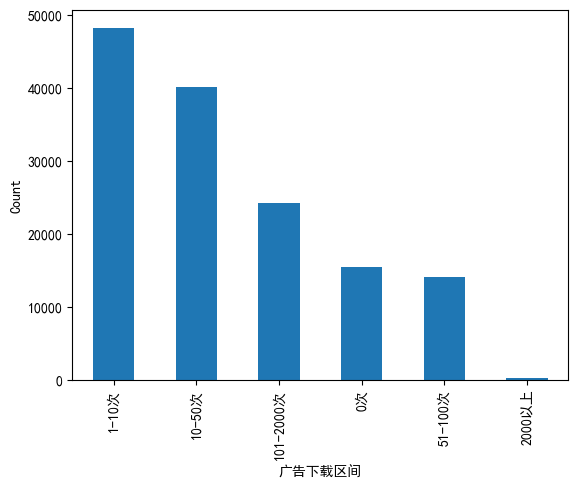

In [38]:
# 统计不同字符串类型的出现次数
counts = df_gg['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('广告下载区间')
plt.ylabel('Count')
plt.show()

In [39]:
df_gg['下载区间'].value_counts()

1-10次        48216
10-50次       40120
101-2000次    24229
0次           15427
51-100次      14046
2000以上         173
Name: 下载区间, dtype: int64

## 归一算价值

In [40]:
# 归一化数据列
df_gg['下载次数归一'] = (df_gg['下载次数'] - df_gg['下载次数'].min()) / (df_gg['下载次数'].max() - df_gg['下载次数'].min())
df_gg['收藏数归一'] = (df_gg['收藏数'] -df_gg['收藏数'].min()) / (df_gg['收藏数'].max() - df_gg['收藏数'].min())
df_gg['内容下载率归一'] = (df_gg['内容下载率'] - df_gg['内容下载率'].min()) / (df_gg['内容下载率'].max() - df_gg['内容下载率'].min())
df_gg['价值'] = df_gg['下载次数归一'] * 0.6 + df_gg['收藏数归一'] * 0.2 + df_gg['内容下载率归一'] * 0.3

## 抽样

In [235]:
gg_limit = df_gg.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(gg_limit) * 0.7)

# 保留前70%的数据
gg_limit = gg_limit.head(num_rows)

In [236]:
# 等距抽样
gg_sampled = gg_limit.iloc[::3]

In [237]:
gg_sampled.shape

(33183, 13)

# 办公

In [44]:
df_bg = pd.read_csv('D:\Ori\数据处理\主站内容分层\\办公.csv')
df_bg.rename(columns={'办公文档PPT素材id': '素材id'}, inplace=True)
df_bg = df_bg.drop_duplicates(subset=['素材id'])

In [45]:
df_bg['内容下载率'] = df_bg['下载次数'] / df_bg['浏览数']
df_bg['内容下载率'] = df_bg['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_bg.fillna(0,inplace=True)

In [46]:
df_bg.shape

(42018, 7)

In [223]:
df_bg['分类'] = '办公'

In [47]:
df_bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42018 entries, 0 to 42056
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    42018 non-null  int64  
 1   标题      42018 non-null  object 
 2   下载人数    42018 non-null  int64  
 3   下载次数    42018 non-null  int64  
 4   浏览数     42018 non-null  int64  
 5   收藏数     42018 non-null  int64  
 6   内容下载率   42018 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 2.6+ MB


In [48]:
df_bg.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,42018.000000,42018.000000,42018.000000,42018.00000,42018.000000,42018.000000
mean,160396.162549,90.638702,104.971941,283.00050,5.863320,0.441324
std,13047.652972,277.492255,351.794290,1527.85492,20.746633,0.217252
min,128654.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,149052.250000,6.000000,6.000000,16.00000,0.000000,0.307692
50%,160527.500000,20.000000,22.000000,53.00000,1.000000,0.424658
75%,171608.750000,85.000000,94.000000,232.00000,5.000000,0.536527
max,182901.000000,23078.000000,33147.000000,174195.00000,2048.000000,1.000000


In [49]:
df_bg['下载区间'] = df_bg['下载次数'].apply(降维)

## 分布

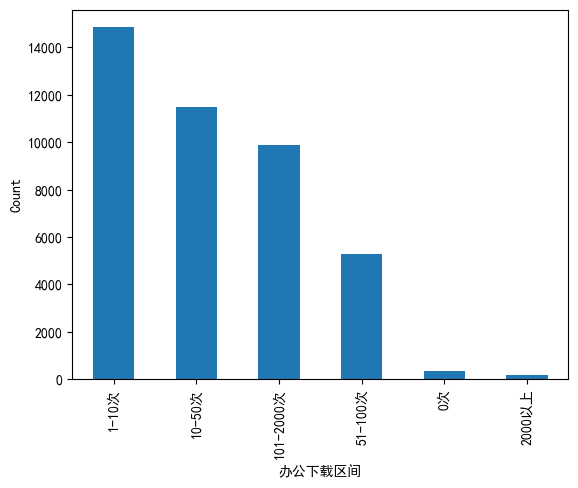

In [50]:
# 统计不同字符串类型的出现次数
counts = df_bg['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('办公下载区间')
plt.ylabel('Count')
plt.show()

In [51]:
df_bg['下载区间'].value_counts()

1-10次        14855
10-50次       11488
101-2000次     9900
51-100次       5274
0次             345
2000以上         156
Name: 下载区间, dtype: int64

## 归一算价值

In [52]:
# 归一化数据列
df_bg['下载次数归一'] = (df_bg['下载次数'] - df_bg['下载次数'].min()) / (df_bg['下载次数'].max() - df_bg['下载次数'].min())
df_bg['收藏数归一'] = (df_bg['收藏数'] -df_bg['收藏数'].min()) / (df_bg['收藏数'].max() - df_bg['收藏数'].min())
df_bg['内容下载率归一'] = (df_bg['内容下载率'] - df_bg['内容下载率'].min()) / (df_bg['内容下载率'].max() - df_bg['内容下载率'].min())
df_bg['价值'] = df_bg['下载次数归一'] * 0.6 + df_bg['收藏数归一'] * 0.2 + df_bg['内容下载率归一'] * 0.3

## 抽样

In [238]:
bg_limit = df_bg.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(bg_limit) * 0.7)

# 保留前70%的数据
bg_limit = bg_limit.head(num_rows)

In [239]:
# 等距抽样
bg_sampled = bg_limit.iloc[::3]

In [240]:
bg_sampled.shape

(9804, 13)

# 视频

In [57]:
df_sp = pd.read_csv('D:\Ori\数据处理\主站内容分层\\视频.csv')
df_sp.rename(columns={'视频素材id': '素材id'}, inplace=True)
df_sp = df_sp.drop_duplicates(subset=['素材id'])

In [58]:
df_sp['内容下载率'] = df_sp['下载次数'] / df_sp['浏览数']
df_sp['内容下载率'] = df_sp['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_sp.fillna(0,inplace=True)

In [271]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39302 entries, 0 to 39301
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   素材id     39302 non-null  int64  
 1   标题       39302 non-null  object 
 2   下载人数     39302 non-null  int64  
 3   下载次数     39302 non-null  int64  
 4   浏览数      39302 non-null  int64  
 5   收藏数      39302 non-null  int64  
 6   内容下载率    39302 non-null  float64
 7   下载区间     39302 non-null  object 
 8   下载次数归一   39302 non-null  float64
 9   收藏数归一    39302 non-null  float64
 10  内容下载率归一  39302 non-null  float64
 11  价值       39302 non-null  float64
 12  分类       39302 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 4.2+ MB


In [224]:
df_sp['分类'] = '视频'

In [60]:
df_sp.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,3.930200e+04,39302.000000,39302.00000,39302.000000,39302.000000,39302.000000
mean,2.715965e+07,80.168261,105.79141,491.759936,7.672968,0.155174
std,2.972757e+05,162.190930,247.67394,867.731372,19.977109,0.116613
min,2.703905e+07,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.704915e+07,12.000000,13.00000,146.000000,1.000000,0.080694
50%,2.705899e+07,29.000000,33.00000,260.000000,2.000000,0.133858
75%,2.707061e+07,78.000000,94.00000,505.000000,7.000000,0.204412
max,2.803014e+07,4776.000000,7423.00000,32828.000000,562.000000,1.000000


In [61]:
df_sp['下载区间'] = df_sp['下载次数'].apply(降维)

## 分布

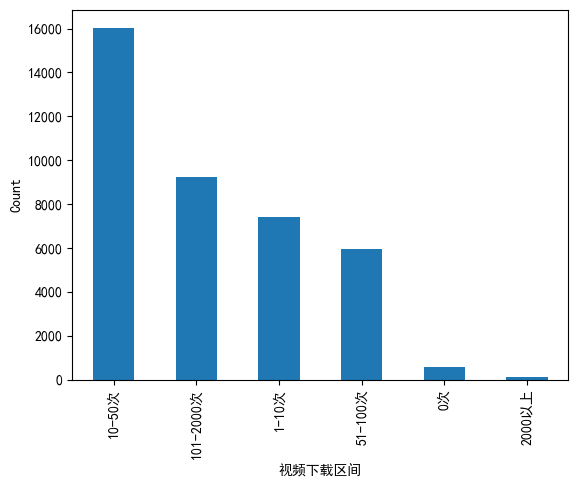

In [62]:
# 统计不同字符串类型的出现次数
counts = df_sp['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('视频下载区间')
plt.ylabel('Count')
plt.show()

In [63]:
df_sp['下载区间'].value_counts()

10-50次       16045
101-2000次     9220
1-10次         7424
51-100次       5952
0次             563
2000以上          98
Name: 下载区间, dtype: int64

## 归一算价值

In [64]:
# 归一化数据列
df_sp['下载次数归一'] = (df_sp['下载次数'] - df_sp['下载次数'].min()) / (df_sp['下载次数'].max() - df_sp['下载次数'].min())
df_sp['收藏数归一'] = (df_sp['收藏数'] -df_sp['收藏数'].min()) / (df_sp['收藏数'].max() - df_sp['收藏数'].min())
df_sp['内容下载率归一'] = (df_sp['内容下载率'] - df_sp['内容下载率'].min()) / (df_sp['内容下载率'].max() - df_sp['内容下载率'].min())
df_sp['价值'] = df_sp['下载次数归一'] * 0.6 + df_sp['收藏数归一'] * 0.2 + df_sp['内容下载率归一'] * 0.3

## 抽样

In [241]:
sp_limit = df_sp.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(sp_limit) * 0.7)

# 保留前70%的数据
sp_limit = sp_limit.head(num_rows)

In [242]:
# 等距抽样
sp_sampled = sp_limit.iloc[::3]

In [273]:
sp_sampled.shape

(9171, 13)

# 艺术字

In [346]:
df_ysz = pd.read_csv('D:\Ori\数据处理\主站内容分层\\艺术字.csv')
df_ysz.rename(columns={'艺术字素材id': '素材id'}, inplace=True)
df_ysz = df_ysz.drop_duplicates(subset=['素材id'])

In [347]:
df_ysz['内容下载率'] = df_ysz['下载次数'] / df_ysz['浏览数']
df_ysz['内容下载率'] = df_ysz['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_ysz.fillna(0,inplace=True)

In [348]:
df_ysz['分类'] = '艺术字'

In [349]:
df_ysz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47635 entries, 0 to 47644
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    47635 non-null  int64  
 1   标题      47635 non-null  object 
 2   下载人数    47635 non-null  int64  
 3   下载次数    47635 non-null  int64  
 4   浏览数     47635 non-null  int64  
 5   收藏数     47635 non-null  int64  
 6   内容下载率   47635 non-null  float64
 7   分类      47635 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 3.3+ MB


In [329]:
df_ysz.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率,下载次数归一,收藏数归一,内容下载率归一,价值
count,3.930200e+04,39302.000000,39302.00000,39302.000000,39302.000000,39302.000000,39302.000000,39302.000000,39302.000000,39302.000000
mean,2.715965e+07,80.168261,105.79141,491.759936,7.672968,0.155174,0.014252,0.013653,0.155174,0.057834
std,2.972757e+05,162.190930,247.67394,867.731372,19.977109,0.116613,0.033366,0.035546,0.116613,0.052431
min,2.703905e+07,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.704915e+07,12.000000,13.00000,146.000000,1.000000,0.080694,0.001751,0.001779,0.080694,0.026421
50%,2.705899e+07,29.000000,33.00000,260.000000,2.000000,0.133858,0.004446,0.003559,0.133858,0.045095
75%,2.707061e+07,78.000000,94.00000,505.000000,7.000000,0.204412,0.012663,0.012456,0.204412,0.073541
max,2.803014e+07,4776.000000,7423.00000,32828.000000,562.000000,1.000000,1.000000,1.000000,1.000000,0.914947


In [350]:
df_ysz['下载区间'] = df_ysz['下载次数'].apply(降维)

## 分布

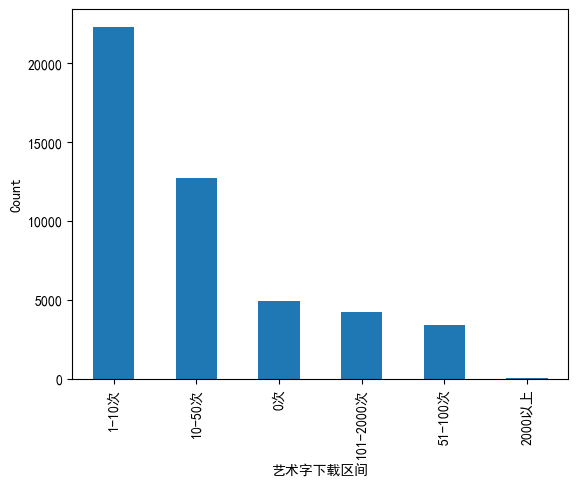

In [351]:
# 统计不同字符串类型的出现次数
counts = df_ysz['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('艺术字下载区间')
plt.ylabel('Count')
plt.show()

In [352]:
df_ysz['下载区间'].value_counts()

1-10次        22311
10-50次       12738
0次            4932
101-2000次     4208
51-100次       3390
2000以上          56
Name: 下载区间, dtype: int64

## 归一算价值

In [353]:
# 归一化数据列
df_ysz['下载次数归一'] = (df_ysz['下载次数'] - df_ysz['下载次数'].min()) / (df_ysz['下载次数'].max() - df_ysz['下载次数'].min())
df_ysz['收藏数归一'] = (df_ysz['收藏数'] -df_ysz['收藏数'].min()) / (df_ysz['收藏数'].max() - df_ysz['收藏数'].min())
df_ysz['内容下载率归一'] = (df_ysz['内容下载率'] - df_ysz['内容下载率'].min()) / (df_ysz['内容下载率'].max() - df_ysz['内容下载率'].min())
df_ysz['价值'] = df_ysz['下载次数归一'] * 0.6 + df_ysz['收藏数归一'] * 0.2 + df_ysz['内容下载率归一'] * 0.3

## 抽样

In [354]:
ysz_limit = df_ysz.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(ysz_limit) * 0.7)

# 保留前70%的数据
ysz_limit = ysz_limit.head(num_rows)

In [355]:
# 等距抽样
ysz_sampled = ysz_limit.iloc[::3]

In [356]:
ysz_sampled.shape

(11115, 13)

# UI

In [79]:
df_ui = pd.read_csv('D:\Ori\数据处理\主站内容分层\\UI.csv')
df_ui.rename(columns={'UI素材id': '素材id'}, inplace=True)
df_ui = df_ui.drop_duplicates(subset=['素材id'])

In [80]:
df_ui['内容下载率'] = df_ui['下载次数'] / df_ui['浏览数']
df_ui['内容下载率'] = df_ui['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_ui.fillna(0,inplace=True)

In [226]:
df_ui['分类'] = 'UI'

In [81]:
df_ui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8518
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    8519 non-null   int64  
 1   标题      8519 non-null   object 
 2   下载人数    8519 non-null   int64  
 3   下载次数    8519 non-null   int64  
 4   浏览数     8519 non-null   int64  
 5   收藏数     8519 non-null   int64  
 6   内容下载率   8519 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 532.4+ KB


In [82]:
df_ui.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,61984.013851,43.339359,49.712290,517.893297,10.049419,0.064359
std,3933.557783,120.197640,147.074824,1019.292792,27.083728,0.061968
min,54599.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,3.000000,3.000000,177.000000,1.000000,0.017045
50%,61743.000000,11.000000,12.000000,267.000000,3.000000,0.045198
75%,65405.500000,33.000000,37.000000,463.500000,8.000000,0.094021
max,68859.000000,2353.000000,3226.000000,27180.000000,691.000000,0.500000


In [83]:
df_ui['下载区间'] = df_ui['下载次数'].apply(降维)

## 分布

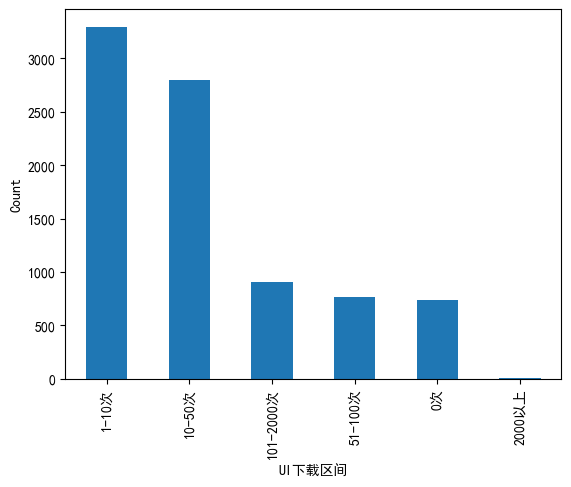

In [84]:
# 统计不同字符串类型的出现次数
counts = df_ui['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('UI下载区间')
plt.ylabel('Count')
plt.show()

In [85]:
df_ui['下载区间'].value_counts()

1-10次        3297
10-50次       2801
101-2000次     907
51-100次       767
0次            739
2000以上          8
Name: 下载区间, dtype: int64

## 归一算价值

In [86]:
# 归一化数据列
df_ui['下载次数归一'] = (df_ui['下载次数'] - df_ui['下载次数'].min()) / (df_ui['下载次数'].max() - df_ui['下载次数'].min())
df_ui['收藏数归一'] = (df_ui['收藏数'] -df_ui['收藏数'].min()) / (df_ui['收藏数'].max() - df_ui['收藏数'].min())
df_ui['内容下载率归一'] = (df_ui['内容下载率'] - df_ui['内容下载率'].min()) / (df_ui['内容下载率'].max() - df_ui['内容下载率'].min())
df_ui['价值'] = df_ui['下载次数归一'] * 0.6 + df_ui['收藏数归一'] * 0.2 + df_ui['内容下载率归一'] * 0.3

## 抽样

In [247]:
ui_limit = df_ui.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(ui_limit) * 0.7)

# 保留前70%的数据
ui_limit = ui_limit.head(num_rows)

In [248]:
# 等距抽样
ui_sampled = ui_limit.iloc[::3]

In [249]:
ui_sampled.shape

(1988, 13)

# 插画

In [90]:
df_ch = pd.read_csv('D:\Ori\数据处理\主站内容分层\\插画.csv')
df_ch.rename(columns={'插画素材id': '素材id'}, inplace=True)
df_ch = df_ch.drop_duplicates(subset=['素材id'])

In [91]:
df_ch['内容下载率'] = df_ch['下载次数'] / df_ch['浏览数']
df_ch['内容下载率'] = df_ch['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_ch.fillna(0,inplace=True)

In [227]:
df_ch['分类'] = '插画'

In [92]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28459 entries, 0 to 28459
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    28459 non-null  int64  
 1   标题      28459 non-null  object 
 2   下载人数    28459 non-null  int64  
 3   下载次数    28459 non-null  int64  
 4   浏览数     28459 non-null  int64  
 5   收藏数     28459 non-null  int64  
 6   内容下载率   28459 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.7+ MB


In [93]:
df_ch['下载区间'] = df_ch['下载次数'].apply(降维)

In [94]:
df_ch.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,28459.000000,28459.000000,28459.000000,28459.000000,28459.000000,28459.000000
mean,89002.067465,52.125900,62.695913,322.544222,7.534488,0.118662
std,9532.501561,115.307819,144.321298,432.749889,16.530342,0.103249
min,64952.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80754.500000,5.000000,5.000000,120.000000,1.000000,0.039326
50%,88806.000000,13.000000,15.000000,192.000000,2.000000,0.087719
75%,97233.500000,46.000000,54.000000,341.000000,7.000000,0.173913
max,106180.000000,2389.000000,3218.000000,11178.000000,346.000000,1.000000


## 分布

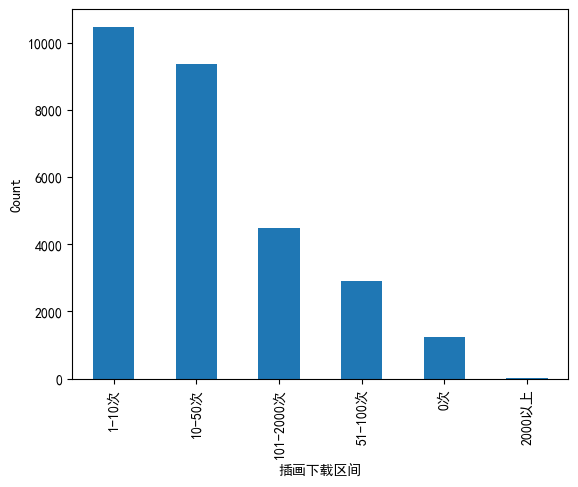

In [95]:
# 统计不同字符串类型的出现次数
counts = df_ch['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('插画下载区间')
plt.ylabel('Count')
plt.show()

In [96]:
df_ch['下载区间'].value_counts()

1-10次        10471
10-50次        9351
101-2000次     4488
51-100次       2913
0次            1228
2000以上           8
Name: 下载区间, dtype: int64

## 归一算价值

In [97]:
# 归一化数据列
df_ch['下载次数归一'] = (df_ch['下载次数'] - df_ch['下载次数'].min()) / (df_ch['下载次数'].max() - df_ch['下载次数'].min())
df_ch['收藏数归一'] = (df_ch['收藏数'] -df_ch['收藏数'].min()) / (df_ch['收藏数'].max() - df_ch['收藏数'].min())
df_ch['内容下载率归一'] = (df_ch['内容下载率'] - df_ch['内容下载率'].min()) / (df_ch['内容下载率'].max() - df_ch['内容下载率'].min())
df_ch['价值'] = df_ch['下载次数归一'] * 0.6 + df_ch['收藏数归一'] * 0.2 + df_ch['内容下载率归一'] * 0.3

## 抽样

In [250]:
ch_limit = df_ch.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(ch_limit) * 0.6)

# 保留前70%的数据
ch_limit = ch_limit.head(num_rows)

In [251]:
# 等距抽样
ch_sampled = ch_limit.iloc[::2]

In [252]:
ch_sampled.shape

(8538, 13)

# 摄影图

In [102]:
df_syt = pd.read_csv('D:\Ori\数据处理\主站内容分层\\摄影图.csv')
df_syt.rename(columns={'摄影图素材id': '素材id'}, inplace=True)
df_syt = df_syt.drop_duplicates(subset=['素材id'])

In [103]:
df_syt['内容下载率'] = df_syt['下载次数'] / df_syt['浏览数']
df_syt['内容下载率'] = df_syt['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_syt.fillna(0,inplace=True)

In [228]:
df_syt['分类'] = '摄影图'

In [104]:
df_syt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119203 entries, 0 to 119202
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   素材id    119203 non-null  int64  
 1   标题      119203 non-null  object 
 2   下载人数    119203 non-null  int64  
 3   下载次数    119203 non-null  int64  
 4   浏览数     119203 non-null  int64  
 5   收藏数     119203 non-null  int64  
 6   内容下载率   119203 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 7.3+ MB


In [105]:
df_syt['下载区间'] = df_syt['下载次数'].apply(降维)

In [106]:
df_syt.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,1.192030e+05,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000
mean,2.462539e+05,14.875121,16.607300,109.679320,0.587510,0.080143
std,2.150990e+05,59.635052,69.334733,167.886729,2.234003,0.098328
min,3.745100e+04,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.795155e+05,1.000000,1.000000,44.000000,0.000000,0.016586
50%,2.123960e+05,3.000000,3.000000,73.000000,0.000000,0.048387
75%,2.445655e+05,9.000000,10.000000,126.000000,1.000000,0.105691
max,1.864860e+06,3566.000000,4470.000000,10135.000000,150.000000,1.000000


## 分布

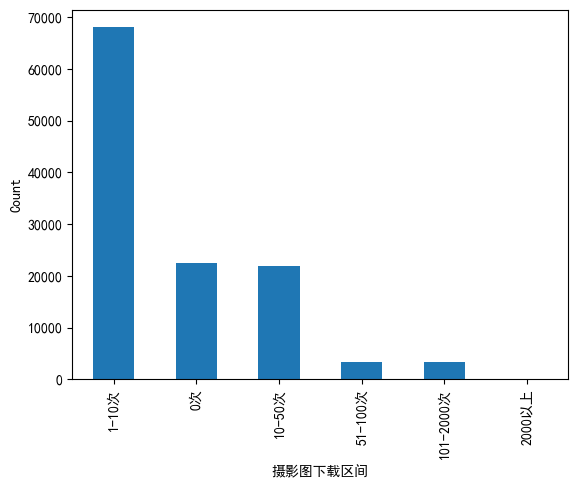

In [107]:
# 统计不同字符串类型的出现次数
counts = df_syt['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('摄影图下载区间')
plt.ylabel('Count')
plt.show()

In [108]:
df_syt['下载区间'].value_counts()

1-10次        68012
0次           22433
10-50次       21910
51-100次       3424
101-2000次     3414
2000以上          10
Name: 下载区间, dtype: int64

## 归一算价值

In [109]:
# 归一化数据列
df_syt['下载次数归一'] = (df_syt['下载次数'] - df_syt['下载次数'].min()) / (df_syt['下载次数'].max() - df_syt['下载次数'].min())
df_syt['收藏数归一'] = (df_syt['收藏数'] -df_syt['收藏数'].min()) / (df_syt['收藏数'].max() - df_syt['收藏数'].min())
df_syt['内容下载率归一'] = (df_syt['内容下载率'] - df_syt['内容下载率'].min()) / (df_syt['内容下载率'].max() - df_syt['内容下载率'].min())
df_syt['价值'] = df_syt['下载次数归一'] * 0.6 + df_syt['收藏数归一'] * 0.2 + df_syt['内容下载率归一'] * 0.3

## 抽样

In [253]:
syt_limit = df_syt.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(syt_limit) * 0.6)

# 保留前70%的数据
syt_limit = syt_limit.head(num_rows)

In [254]:
# 等距抽样
syt_sampled = syt_limit.iloc[::3]

In [255]:
syt_sampled.shape

(23841, 13)

# GIF

In [119]:
df_gif = pd.read_csv('D:\Ori\数据处理\主站内容分层\\GIF.csv')
df_gif.rename(columns={'GIF素材id': '素材id'}, inplace=True)
df_gif = df_gif.drop_duplicates(subset=['素材id'])

In [120]:
df_gif['内容下载率'] = df_gif['下载次数'] / df_gif['浏览数']
df_gif['内容下载率'] = df_gif['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_gif.fillna(0,inplace=True)

In [229]:
df_gif['分类'] = 'GIF'

In [121]:
df_gif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56112 entries, 0 to 56111
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   素材id    56112 non-null  int64  
 1   标题      56112 non-null  object 
 2   下载人数    56112 non-null  int64  
 3   下载次数    56112 non-null  int64  
 4   浏览数     56112 non-null  int64  
 5   收藏数     56112 non-null  int64  
 6   内容下载率   56112 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.4+ MB


In [122]:
df_gif['下载区间'] = df_gif['下载次数'].apply(降维)

In [123]:
df_gif.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率
count,56112.000000,56112.000000,56112.000000,56112.000000,56112.000000,56112.000000
mean,78641.314033,71.956747,88.263651,193.932742,2.976796,0.331391
std,19676.137289,180.176482,242.784646,393.394071,7.555914,0.225783
min,18234.000000,0.000000,0.000000,1.000000,-5.000000,0.000000
25%,61553.750000,8.000000,9.000000,53.000000,0.000000,0.152542
50%,79336.500000,22.000000,25.000000,95.000000,1.000000,0.290113
75%,95738.250000,63.000000,74.000000,196.000000,3.000000,0.473214
max,111849.000000,5462.000000,8607.000000,19892.000000,379.000000,1.000000


## 分布

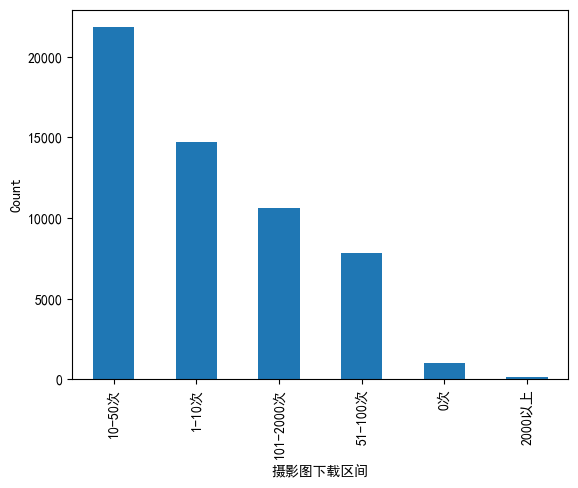

In [124]:
# 统计不同字符串类型的出现次数
counts = df_gif['下载区间'].value_counts()

# 绘制条形图
counts.plot(kind='bar')
plt.xlabel('摄影图下载区间')
plt.ylabel('Count')
plt.show()

In [125]:
df_gif['下载区间'].value_counts()

10-50次       21817
1-10次        14681
101-2000次    10625
51-100次       7803
0次            1037
2000以上         149
Name: 下载区间, dtype: int64

## 归一算价值

In [126]:
# 归一化数据列
df_gif['下载次数归一'] = (df_gif['下载次数'] - df_gif['下载次数'].min()) / (df_gif['下载次数'].max() - df_gif['下载次数'].min())
df_gif['收藏数归一'] = (df_gif['收藏数'] -df_gif['收藏数'].min()) / (df_gif['收藏数'].max() - df_gif['收藏数'].min())
df_gif['内容下载率归一'] = (df_gif['内容下载率'] - df_gif['内容下载率'].min()) / (df_gif['内容下载率'].max() - df_gif['内容下载率'].min())
df_gif['价值'] = df_gif['下载次数归一'] * 0.6 + df_gif['收藏数归一'] * 0.2 + df_gif['内容下载率归一'] * 0.3

## 抽样

In [256]:
gif_limit = df_gif.sort_values(by='内容下载率归一', ascending=False)
# 计算保留的行数
num_rows = int(len(gif_limit) * 0.7)

# 保留前70%的数据
gif_limit = gif_limit.head(num_rows)

In [257]:
# 等距抽样
gif_sampled = gif_limit.iloc[::3]

In [258]:
gif_sampled.shape

(13093, 13)

# 所有内容汇总

In [358]:
# 将多个DataFrame纵向合并
df_total = pd.concat([df_ys, df_bj, df_gg,df_bg,df_sp,df_ysz,df_ui,df_ch,df_syt,df_gif], axis=0)

In [359]:
df_total

,素材id,标题,下载人数,下载次数,浏览数,收藏数,内容下载率,下载区间,下载次数归一,收藏数归一,内容下载率归一,价值,分类
0,12958107,蓝色语文书籍,23,23,43,0,0.534884,10-50次,0.000256,0.000000,0.534884,0.160618,元素
1,12958108,蓝色语文学习,16,18,109,0,0.165138,10-50次,0.000200,0.000000,0.165138,0.049661,元素
2,12958109,水龙头饮用水水杯,66,82,113,1,0.725664,51-100次,0.000911,0.001267,0.725664,0.218499,元素
3,12958110,水龙头水杯饮用水,437,482,524,1,0.919847,101-2000次,0.005355,0.001267,0.919847,0.279420,元素
4,12958111,水龙头饮用水,18,19,42,0,0.452381,10-50次,0.000211,0.000000,0.452381,0.135841,元素
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56107,111815,2023新年快乐兔年贴纸卡通动图gif,98,115,114,1,1.000000,101-2000次,0.013361,0.015625,1.000000,0.311142,GIF
56108,111783,新年春节卡通小女孩吃饺子动图gif,0,0,8,0,0.000000,0次,0.000000,0.013021,0.000000,0.002604,GIF
56109,111834,极简卡通图形加载动画,19,26,62,1,0.419355,10-50次,0.003021,0.015625,0.419355,0.130744,GIF
56110,111764,春节庆祝新年金色烟花,36,43,93,1,0.462366,10-50次,0.004996,0.015625,0.462366,0.144832,GIF


In [360]:
df_total['内容下载率'] = df_total['下载次数'] / df_total['浏览数']
df_total['内容下载率'] = df_total['内容下载率'].apply(lambda x: 1 if x >= 1 else x)
df_total.fillna(0,inplace=True)

In [361]:
df_total = df_total.drop_duplicates(subset=['素材id','浏览数'])

In [362]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862155 entries, 0 to 56111
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   素材id     862155 non-null  int64  
 1   标题       862155 non-null  object 
 2   下载人数     862155 non-null  int64  
 3   下载次数     862155 non-null  int64  
 4   浏览数      862155 non-null  int64  
 5   收藏数      862155 non-null  int64  
 6   内容下载率    862155 non-null  float64
 7   下载区间     862155 non-null  object 
 8   下载次数归一   862155 non-null  float64
 9   收藏数归一    862155 non-null  float64
 10  内容下载率归一  862155 non-null  float64
 11  价值       862155 non-null  float64
 12  分类       862155 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 92.1+ MB


In [363]:
df_total.shape

(862155, 13)

In [307]:
df_total['下载区间'] = df_total['下载次数'].apply(降维)

C:\Users\HCKJ\AppData\Local\Temp\ipykernel_19264\4031219677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['下载区间'] = df_total['下载次数'].apply(降维)


In [364]:
df_total.describe()

,素材id,下载人数,下载次数,浏览数,收藏数,内容下载率,下载次数归一,收藏数归一,内容下载率归一,价值
count,8.621550e+05,862155.000000,862155.000000,862155.000000,862155.000000,862155.000000,862155.000000,862155.000000,862155.000000,862155.000000
mean,7.999319e+06,55.918395,69.009687,197.578286,3.772043,0.229439,0.005283,0.007654,0.230075,0.073723
std,6.826730e+06,235.294999,310.904151,823.057748,13.802832,0.241312,0.020572,0.024232,0.241197,0.077250
min,1.823400e+04,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.350335e+05,2.000000,2.000000,31.000000,0.000000,0.046512,0.000068,0.000000,0.047619,0.015018
50%,6.110501e+06,8.000000,9.000000,76.000000,0.000000,0.145669,0.000567,0.000977,0.147059,0.047187
75%,1.313323e+07,33.000000,40.000000,180.000000,2.000000,0.333333,0.002829,0.006667,0.334887,0.109856
max,2.803014e+07,54302.000000,90016.000000,460059.000000,2048.000000,1.000000,1.000000,1.000000,1.000000,1.033017


In [365]:
df_total.to_csv('D:\Ori\数据处理\主站内容分层\\所有结果.csv')

# 抽样内容汇总

In [366]:
# 将多个DataFrame纵向合并
sampled_total = pd.concat(
    [ys_sampled,bj_sampled,gg_sampled,bg_sampled,sp_sampled,ysz_sampled,ui_sampled,ch_sampled,syt_sampled,gif_sampled]
    , axis=0)

In [367]:
sampled_total = sampled_total.drop_duplicates(subset=['素材id','浏览数'])

In [368]:
sampled_total.shape

(199127, 13)

In [369]:
sampled_total

,素材id,标题,下载人数,下载次数,浏览数,收藏数,内容下载率,下载区间,下载次数归一,收藏数归一,内容下载率归一,价值,分类
135670,13132598,中国风古风祥云,207,231,227,11,1.000000,101-2000次,0.002566,0.013942,1.000000,0.304328,元素
225117,13356165,干辣椒香叶草果,59,69,69,0,1.000000,51-100次,0.000767,0.000000,1.000000,0.300460,元素
291467,13452679,云彩云朵朝霞,46,54,45,0,1.000000,51-100次,0.000600,0.000000,1.000000,0.300360,元素
255776,13386865,新年立体锦囊福袋春节红色喜庆,173,186,175,2,1.000000,101-2000次,0.002066,0.002535,1.000000,0.301747,元素
255773,13386862,锦囊立体福袋,97,111,103,2,1.000000,101-2000次,0.001233,0.002535,1.000000,0.301247,元素
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48296,103051,新年新春宇航员拜年新年大吉动图gif,4,5,28,0,0.178571,1-10次,0.000581,0.013021,0.178571,0.056524,GIF
12753,60019,敦煌文化古文化竖版背景H5海报沙漠中国风动图gif,24,25,140,0,0.178571,10-50次,0.002905,0.013021,0.178571,0.057918,GIF
34025,86226,城市建筑剪影蓝色动图gif,4,5,28,0,0.178571,1-10次,0.000581,0.013021,0.178571,0.056524,GIF
24457,75184,中秋节中秋放假很开心休息表情包卡通动图gif,7,10,56,1,0.178571,1-10次,0.001162,0.015625,0.178571,0.057394,GIF


In [370]:
sampled_total.to_csv('D:\Ori\数据处理\主站内容分层\\所有类目抽样结果.csv')

# 样本与总体对比

In [371]:
df_total.shape

(862155, 13)

In [372]:
sampled_total.shape

(199127, 13)

In [144]:
# 使用 str.contains() 方法筛选包含"节"字符的列
总体 = df_total[df_total['标题'].str.contains('科技',na=False)]
总体.shape

(18953, 12)

In [145]:
# 使用 str.contains() 方法筛选包含"节"字符的列
样本 = sampled_total[sampled_total['标题'].str.contains('科技',na=False)]
样本.shape

(4599, 12)

# 未被抽样的内容抽选节日

In [373]:
diff_rows = df_total.merge(sampled_total, indicator=True, how='left').loc[lambda x: x['_merge'] == 'left_only']
diff_rows

,素材id,标题,下载人数,下载次数,浏览数,收藏数,内容下载率,下载区间,下载次数归一,收藏数归一,内容下载率归一,价值,分类,_merge
0,12958107,蓝色语文书籍,23,23,43,0,0.534884,10-50次,0.000256,0.000000,0.534884,0.160618,元素,left_only
1,12958108,蓝色语文学习,16,18,109,0,0.165138,10-50次,0.000200,0.000000,0.165138,0.049661,元素,left_only
2,12958109,水龙头饮用水水杯,66,82,113,1,0.725664,51-100次,0.000911,0.001267,0.725664,0.218499,元素,left_only
4,12958111,水龙头饮用水,18,19,42,0,0.452381,10-50次,0.000211,0.000000,0.452381,0.135841,元素,left_only
6,12958113,水龙头饮用水水滴,5,5,22,0,0.227273,1-10次,0.000056,0.000000,0.227273,0.068215,元素,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862150,111815,2023新年快乐兔年贴纸卡通动图gif,98,115,114,1,1.000000,101-2000次,0.013361,0.015625,1.000000,0.311142,GIF,left_only
862151,111783,新年春节卡通小女孩吃饺子动图gif,0,0,8,0,0.000000,0次,0.000000,0.013021,0.000000,0.002604,GIF,left_only
862152,111834,极简卡通图形加载动画,19,26,62,1,0.419355,10-50次,0.003021,0.015625,0.419355,0.130744,GIF,left_only
862153,111764,春节庆祝新年金色烟花,36,43,93,1,0.462366,10-50次,0.004996,0.015625,0.462366,0.144832,GIF,left_only


In [378]:
diff_rows.to_csv('D:\Ori\数据处理\主站内容分层\\未被抽样结果.csv')

In [379]:
diff_rows.shape

(663045, 14)

In [380]:
diff_rows_fe = diff_rows[diff_rows['标题'].str.contains('节',na=False)]
diff_rows_fe.shape

(102430, 14)

In [381]:
# 等距抽样
diff_rows_fe_sampled = diff_rows_fe.iloc[::3]

In [382]:
diff_rows_fe_sampled.shape

(34144, 14)

In [383]:
diff_rows_fe_sampled.to_csv('D:\Ori\数据处理\主站内容分层\\未被抽样结果2.csv')

# 合并节日和之前抽选的素材

In [384]:
sampled_total_2 = pd.concat([sampled_total, diff_rows_fe_sampled], axis=0)
sampled_total_2.shape

(233271, 14)

In [424]:
查询 = sampled_total_2[sampled_total_2['标题'].str.contains('国潮',na=False)]
查询.shape

(5667, 14)

In [425]:
# 使用 str.contains() 方法筛选包含"节"字符的列
总体 = df_total[df_total['标题'].str.contains('国潮',na=False)]
总体.shape

(17533, 13)

In [385]:
sampled_total_2.to_csv('D:\Ori\数据处理\主站内容分层\\企业素材.csv')